## COLLECTING DATA

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

%matplotlib inline
sns.set_style("whitegrid")
sns.set(font_scale=2)

In [57]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


## DATA ANALYSIS

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [59]:
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [60]:
data.mean()

age         54.43
sex          0.70
cp           0.94
trestbps   131.61
chol       246.00
fbs          0.15
restecg      0.53
thalach    149.11
exang        0.34
oldpeak      1.07
slope        1.39
ca           0.75
thal         2.32
target       0.51
dtype: float64

In [61]:
categorical_values = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_values.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

In [62]:
categorical_values

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

## DATA VISUALIZATION 

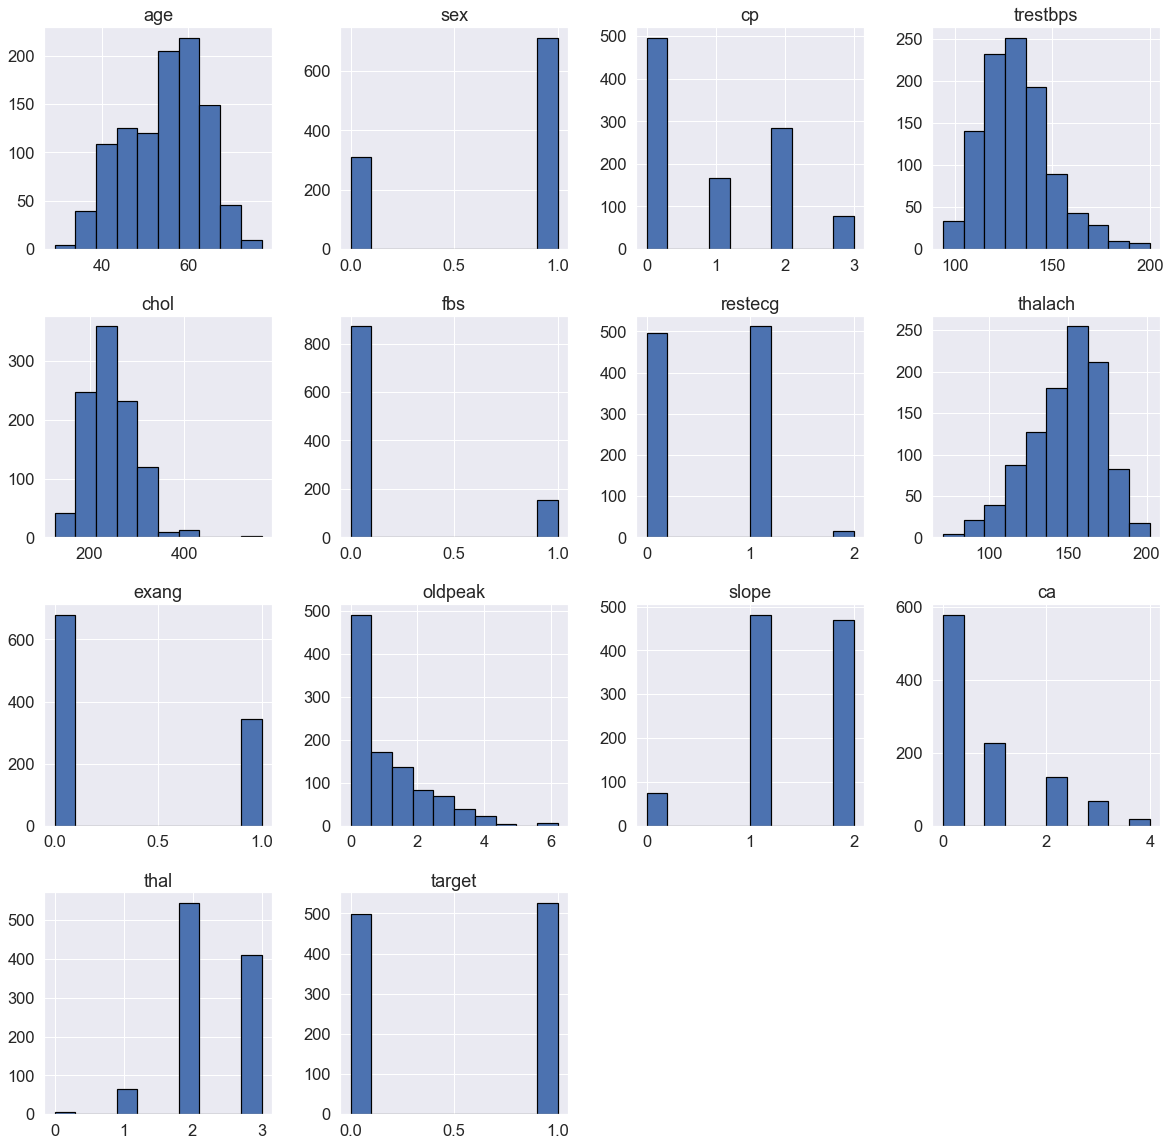

In [63]:
sns.set(font_scale=1.5)
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

C:\Users\Kaibo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Kaibo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


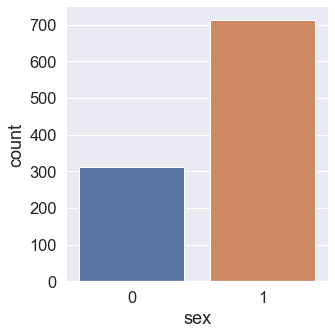

In [64]:
sns.factorplot('sex', data=data, kind='count')


C:\Users\Kaibo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Kaibo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


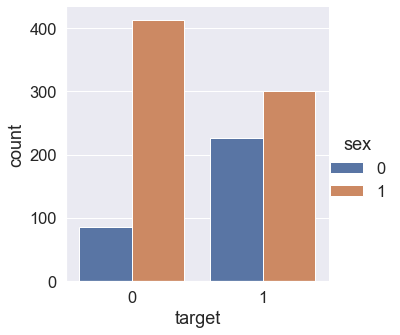

In [65]:
sns.factorplot('target', data=data, hue='sex', kind='count')

C:\Users\Kaibo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Kaibo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


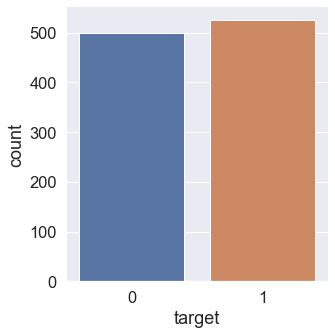

In [66]:
sns.factorplot('target', data=data, kind='count')

<AxesSubplot:>

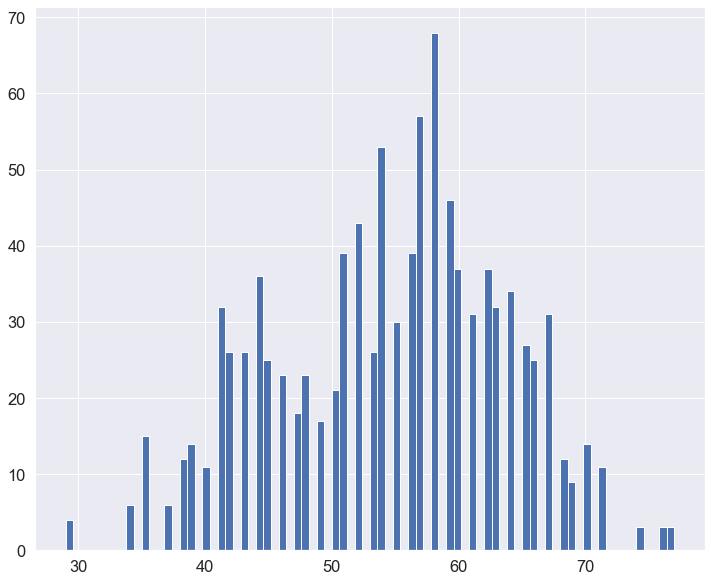

In [67]:
plt.figure(figsize=(12, 10))
data.age.hist(bins=80)

In [68]:
print(f"The most of the patients have a mean age of : {data.age.mean()}")

The most of the patients have a mean age of : 54.43414634146342


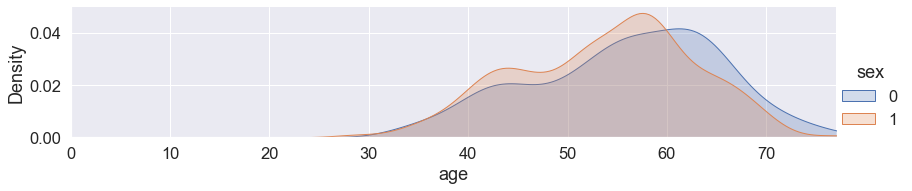

In [69]:
fig = sns.FacetGrid(data, hue="sex", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

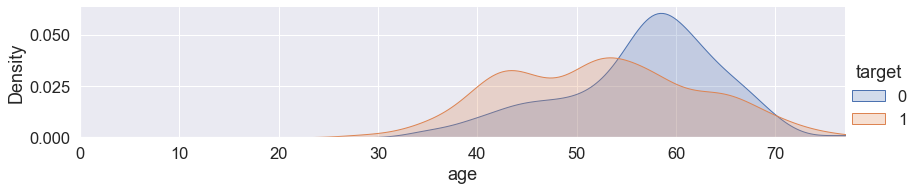

In [70]:
fig = sns.FacetGrid(data, hue="target", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

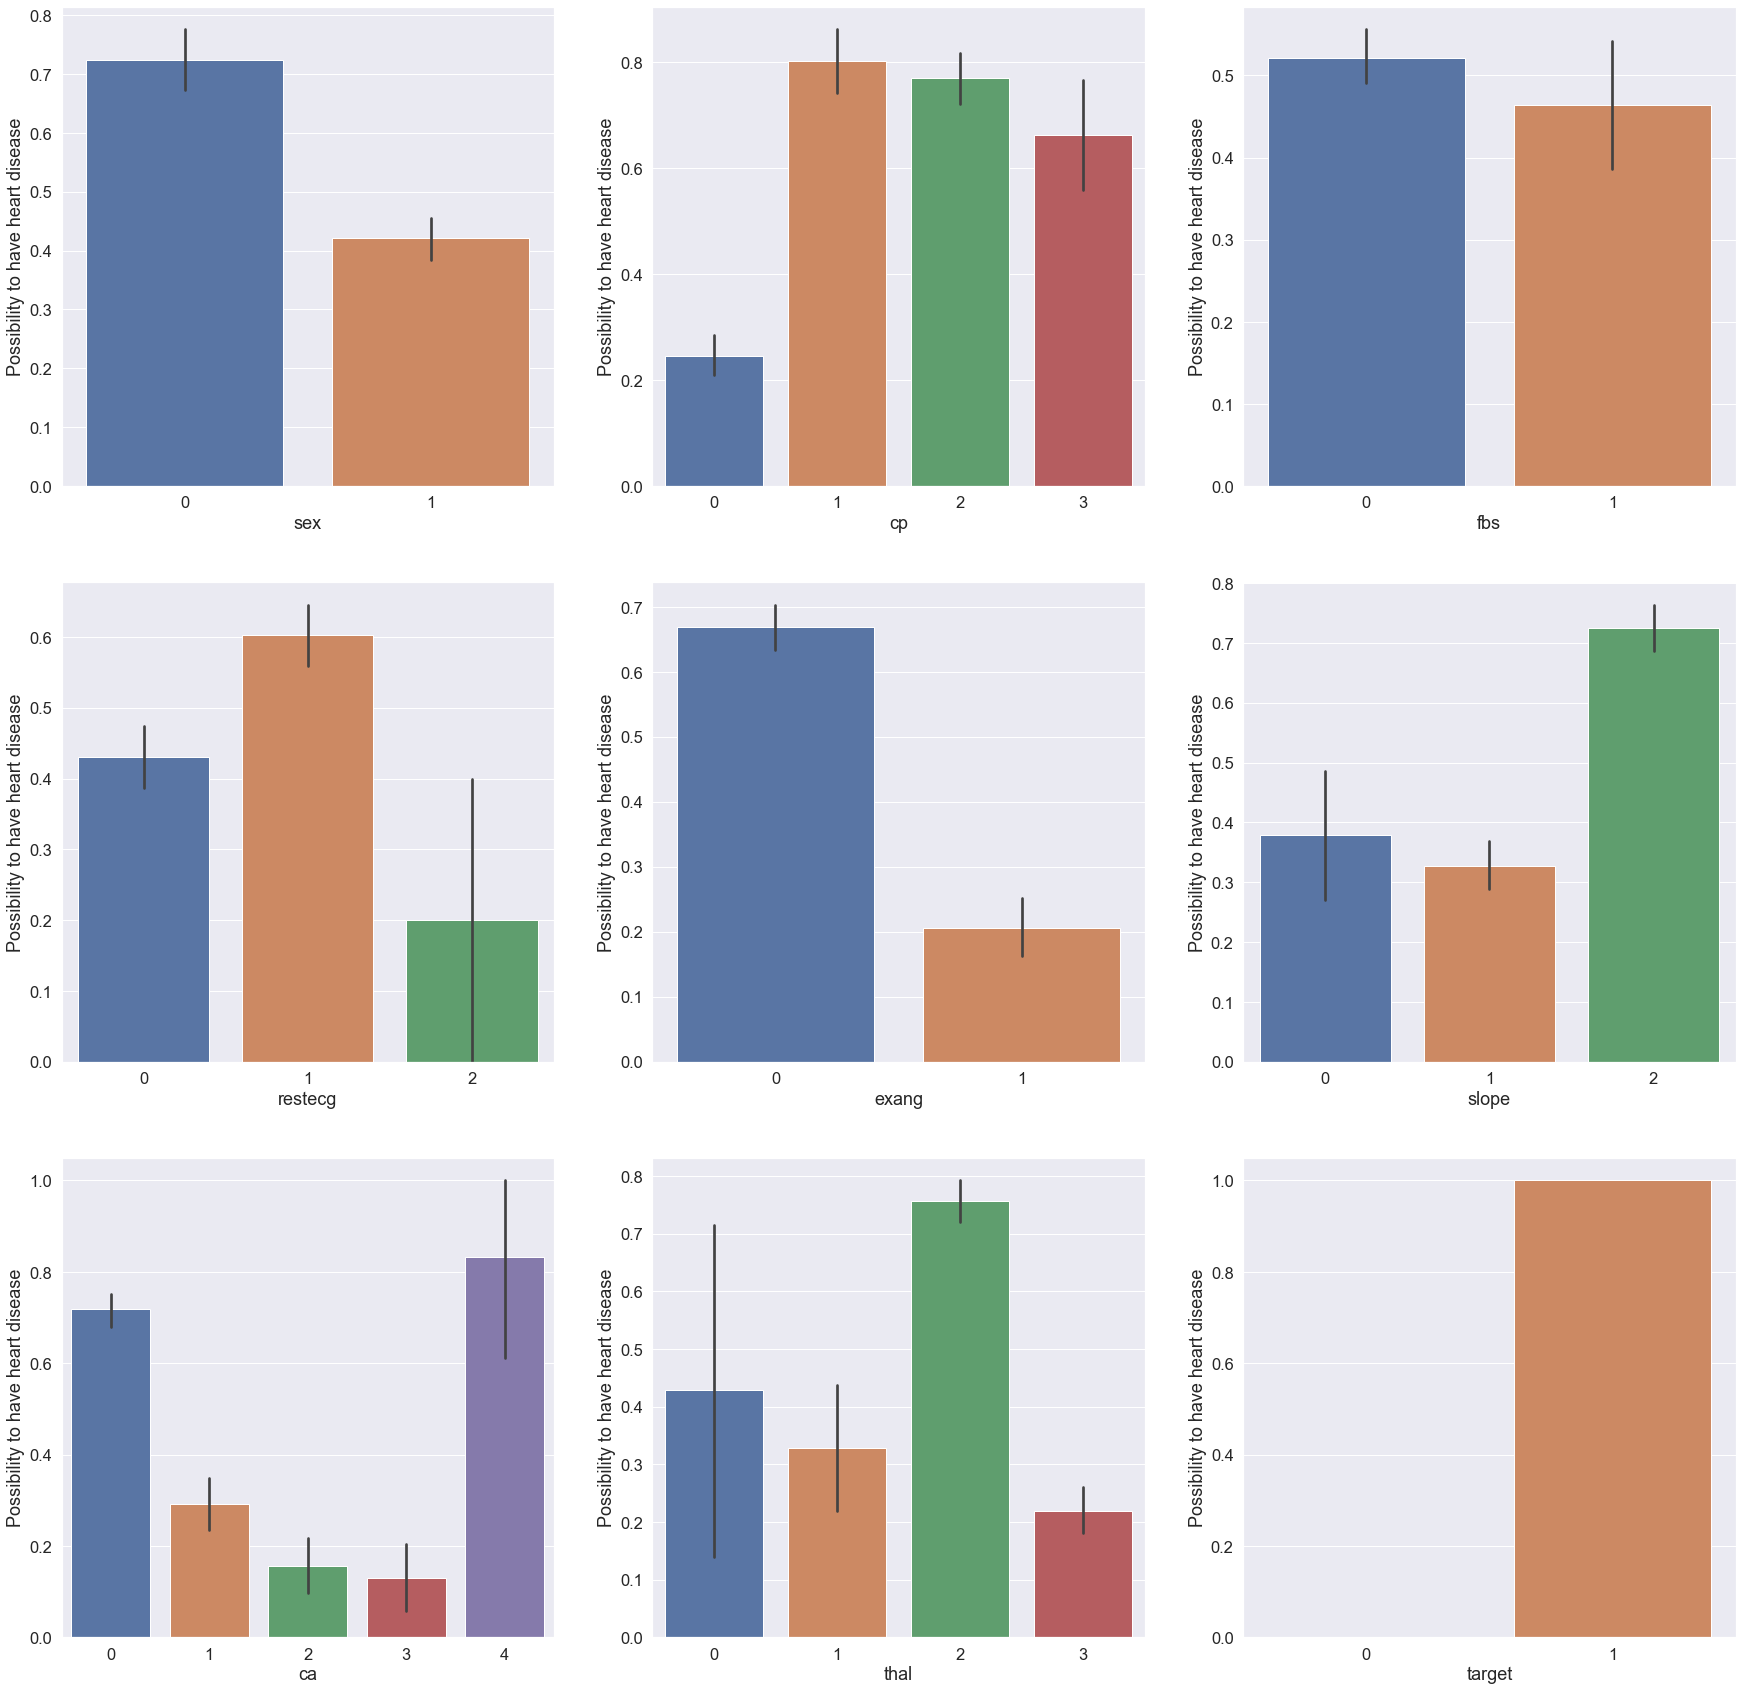

In [71]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=data)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

## CORRELATION MATRIX

<AxesSubplot:>

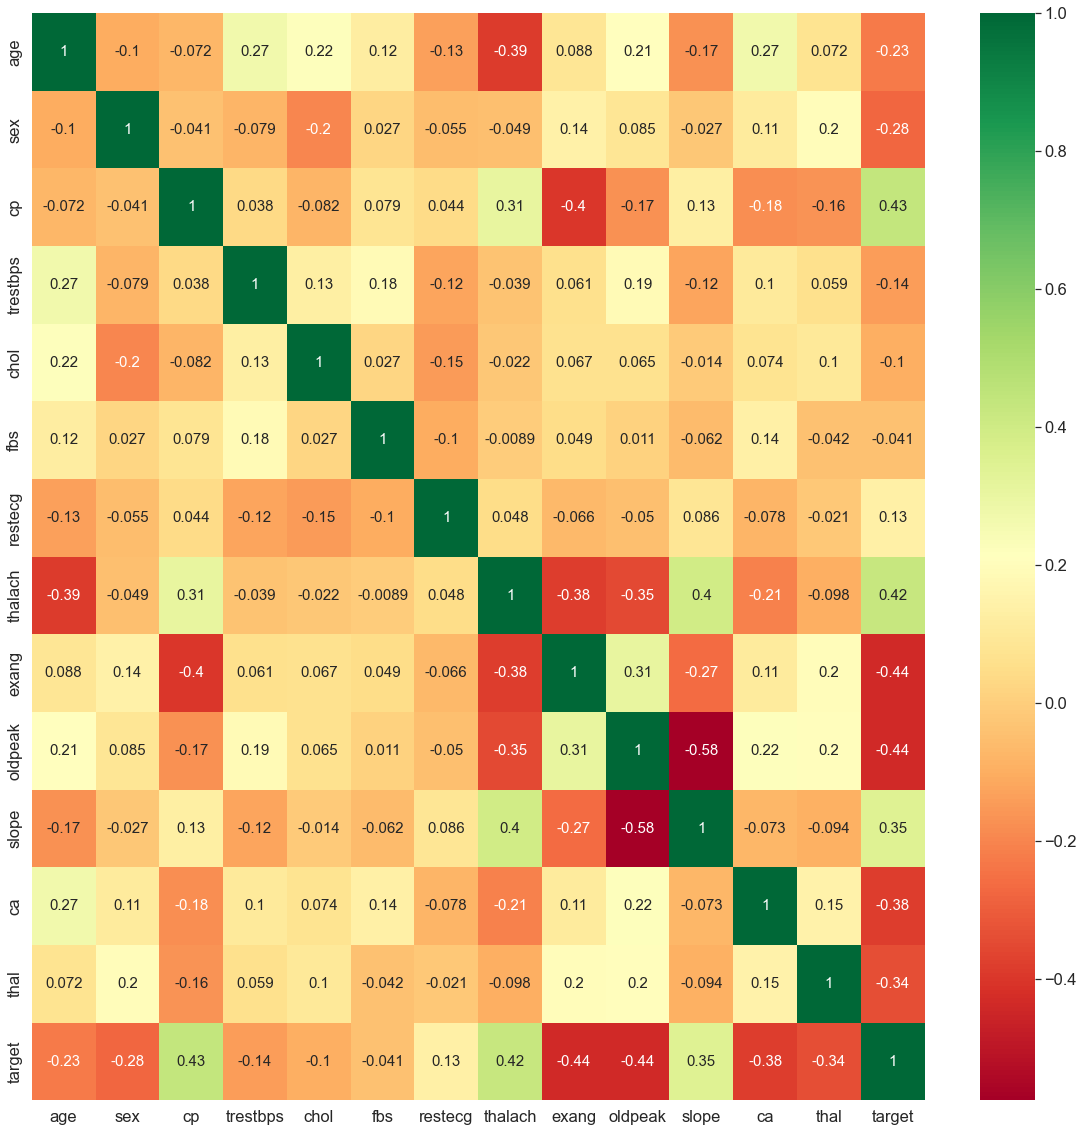

In [72]:
corr_matrix = data.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## DATA PROCESSING 

In [73]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [74]:
df = data.dropna()
df = df.drop(columns = ['oldpeak', 'slope', 'ca', 'thal', 'fbs', 'restecg', 'exang'])
df = df.rename(columns = {'age': 'age', 'sex': 'gender', 'cp': 'chest pain', 'trestbps': 'blood pressure', 'chol': 'cholestrol level', 'thalach': 'max heart rate', })
df.head()

,age,gender,chest pain,blood pressure,cholestrol level,max heart rate,target
0,52,1,0,125,212,168,0
1,53,1,0,140,203,155,0
2,70,1,0,145,174,125,0
3,61,1,0,148,203,161,0
4,62,0,0,138,294,106,0


In [75]:
df.head()

,age,gender,chest pain,blood pressure,cholestrol level,max heart rate,target
0,52,1,0,125,212,168,0
1,53,1,0,140,203,155,0
2,70,1,0,145,174,125,0
3,61,1,0,148,203,161,0
4,62,0,0,138,294,106,0


In [76]:
df = shuffle(df)
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1],random_state=42, test_size=0.05)

## MODEL TRAINING
Here we train a classification Model to predict whether a person has a heart disease or not based on the following features:
* age
* gender	
* chest pain	
* blood pressure	
* cholesterol level	
* max heart rate

## KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
train_acc=[]
test_acc=[]

for k in range(1,31):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    # training time accuracy
    train_acc.append(model.score(x_train,y_train))
    # test time accuracy
    test_acc.append(model.score(x_test,y_test))

In [79]:
train_acc

[1.0,
 0.998972250770812,
 0.998972250770812,
 0.9784172661870504,
 0.9681397738951696,
 0.8602261048304214,
 0.8211716341212744,
 0.8006166495375129,
 0.763617677286742,
 0.7718396711202467,
 0.7697841726618705,
 0.7595066803699897,
 0.750256937307297,
 0.7574511819116135,
 0.7533401849948612,
 0.7718396711202467,
 0.7697841726618705,
 0.762589928057554,
 0.7595066803699897,
 0.7533401849948612,
 0.7492291880781089,
 0.7533401849948612,
 0.7420349434737924,
 0.7348406988694759,
 0.736896197327852,
 0.7255909558067831,
 0.7204522096608428,
 0.7225077081192189,
 0.7297019527235354,
 0.7266187050359713]

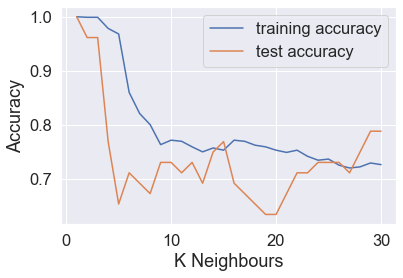

In [80]:
plt.plot(range(1,31), train_acc,label="training accuracy")
plt.plot(range(1,31),test_acc,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K Neighbours")
plt.legend()
plt.savefig("KNN Comparison Models")

In [81]:
knn_model=KNeighborsClassifier(n_neighbors=30)
knn_model.fit(x_train,y_train)
train_accuracy=knn_model.score(x_train,y_train)
test_accuracy=knn_model.score(x_test,y_test)
print("Accuracy in Training: ",train_accuracy)
print("Accuracy in testing: ", test_accuracy)

Accuracy in Training:  0.7266187050359713
Accuracy in testing:  0.7884615384615384


In [82]:
x_train.columns

Index(['age', 'gender', 'chest pain', 'blood pressure', 'cholestrol level',
       'max heart rate'],
      dtype='object')

In [83]:
d=70,1,1,160,500,200
pred=knn_model.predict([d])[0]
if pred==0:
    print("Prediction: Not Suffering With heart disease")
else:
    print("Prediction: Suffering With heart disease")

Prediction: Suffering With heart disease


C:\Users\Kaibo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [84]:
d=34,0,1,118,210,192
pred=knn_model.predict([d])[0]
if pred==0:
    print("Prediction: Not Suffering With heart disease")
else:
    print("Prediction: Suffering With heart disease")

Prediction: Suffering With heart disease


C:\Users\Kaibo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## DECISION TREE

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
print("Training Acc: ",dt_model.score(x_train, y_train))
print("Test Acc: ",dt_model.score(x_test, y_test))

Training Acc:  1.0
Test Acc:  1.0


In [86]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(x_train, y_train)
print("Training Acc: ",dt_model.score(x_train, y_train))
print("Test Acc: ",dt_model.score(x_test, y_test))

Training Acc:  0.8725590955806783
Test Acc:  0.9038461538461539


## MLP

In [87]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=42)
nn_model.fit(x_train, y_train)
print("Training Acc: ",nn_model.score(x_train, y_train))
print("Test Acc: ",nn_model.score(x_test, y_test))

Training Acc:  0.7255909558067831
Test Acc:  0.75


In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

xtrain_scaled = scaler.fit_transform(x_train)
xtest_scaled = scaler.fit_transform(x_test)

nn_model1 = MLPClassifier(random_state=42)
nn_model1.fit(xtrain_scaled, y_train)
print("Training Acc: ",nn_model1.score(xtrain_scaled, y_train))
print("Test Acc: ",nn_model1.score(xtest_scaled, y_test))

Training Acc:  0.8458376156217883
Test Acc:  0.8846153846153846


C:\Users\Kaibo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [89]:
nn_model.coefs_

[array([[-5.37949520e-05,  2.13365072e-01,  1.21200211e-01,
          4.58515234e-02, -1.81947312e-01, -1.63291272e-01,
         -2.02334520e-01,  8.00843319e-03,  4.68901242e-02,
          6.70891851e-04, -2.14179425e-02,  2.22732415e-01,
          1.55325799e-01, -1.38649606e-01, -1.37060146e-01,
         -4.44687482e-03, -4.99840911e-04,  2.54395325e-02,
         -3.32928707e-02, -1.09532226e-01,  5.37930443e-02,
         -1.72904390e-01, -1.30109921e-01, -4.22634242e-02,
          2.41453520e-02,  1.36144968e-01, -3.55915322e-03,
          6.95087482e-03,  1.13593729e-05, -1.76938298e-02,
          2.45190062e-05, -1.56219722e-01, -1.90806762e-01,
          1.70637721e-02,  1.93850937e-02,  1.47531998e-01,
         -9.88254407e-02, -1.93184765e-01,  8.50355440e-02,
         -1.33726109e-06, -1.90992446e-01, -3.69476630e-03,
         -1.93821444e-02,  2.06910422e-01, -1.16053871e-01,
          7.77946555e-02, -9.20621858e-02,  2.49203731e-02,
         -1.53075767e-02, -4.36238300e-0

In [90]:
nn_model1.coefs_

[array([[-9.63872087e-02,  1.59173272e-01,  4.29444969e-02,
          8.88190646e-02, -2.96822899e-01, -2.58753392e-01,
         -3.03988953e-01,  2.52228911e-01,  5.60729168e-02,
          1.27526517e-01, -4.05166574e-01,  2.40057303e-01,
          1.23039438e-01, -2.16787959e-01, -2.48783158e-01,
         -2.01271503e-01, -5.04623635e-02, -1.65156825e-01,
         -1.19862866e-02, -1.75649667e-01,  1.68942862e-02,
         -2.77920346e-01, -1.09721283e-01, -2.44832692e-01,
         -1.59494660e-01,  3.18218619e-01, -2.67576064e-01,
          4.40429406e-03,  2.32460535e-02, -3.39069569e-01,
          1.59403765e-01, -3.18745004e-01, -4.79206833e-01,
          4.22024754e-01,  9.64732391e-02,  5.49018516e-03,
         -1.10972667e-01, -3.02806001e-01,  1.36490937e-01,
         -1.32449777e-01, -2.64770773e-01,  9.08191539e-02,
         -4.75866808e-01,  1.78181016e-01, -2.80235630e-01,
          5.03314498e-02, -2.17935081e-01, -1.68660574e-01,
         -1.27030802e-01, -3.99292839e-0

## LOGISTIC REGRESSION

In [91]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [92]:
print("Training Acc: ",lr_model.score(x_train, y_train))
print("Test Acc: ",lr_model.score(x_test, y_test))

Training Acc:  0.8006166495375129
Test Acc:  0.9230769230769231


## RANDOM FOREST

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
print("Training Acc: ",rf_model.score(x_train, y_train))
print("Test Acc: ",rf_model.score(x_test, y_test))

Training Acc:  1.0
Test Acc:  1.0


## SELECTING BEST ALGORITHM

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score, classification_report

## METRICS

## confusion matrix

In [96]:
print (" Confusion Matrix for Logistic Regression: ")
lr_conf_mat = confusion_matrix(y_test,lr_model.predict(x_test))
print (lr_conf_mat)
print (" Confusion Matrix for Decision Tree: ")
dt_conf_mat = confusion_matrix(y_test,dt_model.predict(x_test))
print (dt_conf_mat)
print (" Confusion Matrix for Random Forest: ")
rf_conf_mat = confusion_matrix(y_test,rf_model.predict(x_test))
print (rf_conf_mat)
print (" Confusion Matrix for KNN: ")
knn_conf_mat = confusion_matrix(y_test,knn_model.predict(x_test))
print (knn_conf_mat)
print (" Confusion Matrix for MLP: ")
nn_conf_mat = confusion_matrix(y_test,nn_model.predict(x_test))
print (nn_conf_mat)

 Confusion Matrix for Logistic Regression: 
[[20  0]
 [ 4 28]]
 Confusion Matrix for Decision Tree: 
[[20  0]
 [ 5 27]]
 Confusion Matrix for Random Forest: 
[[20  0]
 [ 0 32]]
 Confusion Matrix for KNN: 
[[18  2]
 [ 9 23]]
 Confusion Matrix for MLP: 
[[20  0]
 [13 19]]


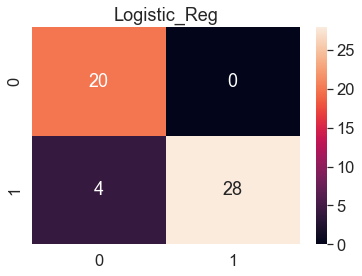

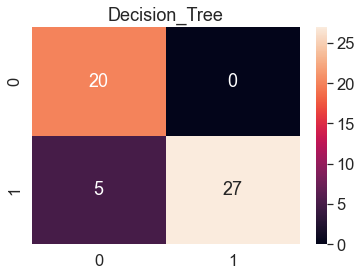

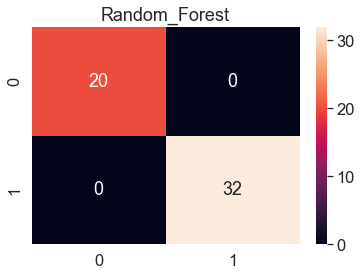

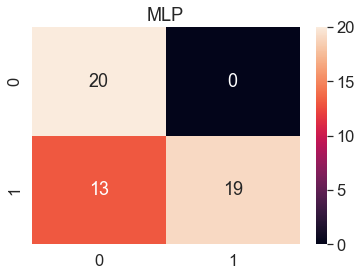

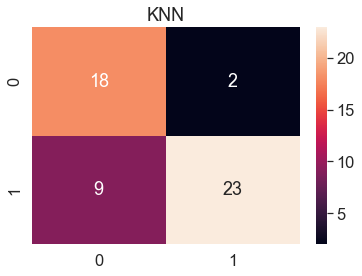

In [97]:
conf_mat_final = { 'Logistic_Reg': lr_conf_mat , 'Decision_Tree': dt_conf_mat, 'Random_Forest': rf_conf_mat, 'MLP': nn_conf_mat, 'KNN': knn_conf_mat}
for label,matrix in conf_mat_final.items():
    plt.title (label)
    sns.heatmap(matrix, annot=True)
    plt.show()

## classification report

In [98]:
print (" classification report for Logistic Regression: ")
print (classification_report(y_test,lr_model.predict(x_test)))
print (" classification report for Decision Tree: ")
print (classification_report(y_test,dt_model.predict(x_test)))
print (" classification report for Random Forest: ")
print (classification_report(y_test,rf_model.predict(x_test)))
print (" classification report for KNN: ")
print (classification_report(y_test,knn_model.predict(x_test)))
print (" classification report for MLP: ")
print (classification_report(y_test,nn_model.predict(x_test)))

 classification report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.88      0.93        32

    accuracy                           0.92        52
   macro avg       0.92      0.94      0.92        52
weighted avg       0.94      0.92      0.92        52

 classification report for Decision Tree: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       1.00      0.84      0.92        32

    accuracy                           0.90        52
   macro avg       0.90      0.92      0.90        52
weighted avg       0.92      0.90      0.91        52

 classification report for Random Forest: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        32

    accuracy                           1.00    

## accuracy model

In [99]:
lr_acc = accuracy_score (y_test, lr_model.predict(x_test))
print ("Accuracy for Logistic Regression Model: ")
lr_acc

Accuracy for Logistic Regression Model: 


0.9230769230769231

In [100]:
dt_acc = accuracy_score (y_test, dt_model.predict(x_test))
print ("Accuracy for Decision Tree Model: ")
dt_acc

Accuracy for Decision Tree Model: 


0.9038461538461539

In [101]:
nn_acc = accuracy_score (y_test, nn_model.predict(x_test))
print ("Accuracy for MLP Model: ")
nn_acc

Accuracy for MLP Model: 


0.75

In [102]:
knn_acc = accuracy_score (y_test, knn_model.predict(x_test))
print ("Accuracy for KNN Model: ")
knn_acc

Accuracy for KNN Model: 


0.7884615384615384

In [103]:
rf_acc = accuracy_score (y_test, rf_model.predict(x_test))
print ("Accuracy for Random Forest Model: ")
rf_acc

Accuracy for Random Forest Model: 


1.0

In [104]:
score = { 'Logistic_Reg': [lr_acc] , 'Decision_Tree': [dt_acc], 'Random_Forest': [rf_acc], 'MLP': [nn_acc], 'KNN': [knn_acc]}
score_df = pd.DataFrame(score)
score_df

,Logistic_Reg,Decision_Tree,Random_Forest,MLP,KNN
0,0.92,0.90,1.00,0.75,0.79


<AxesSubplot:>

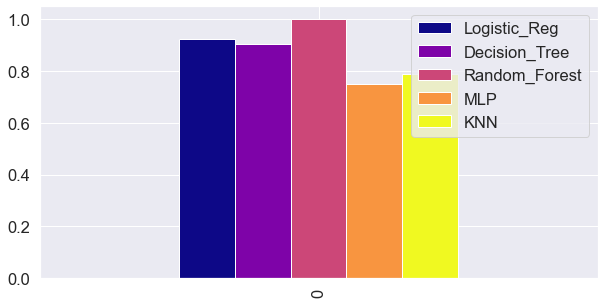

In [105]:
score_df.plot(kind='bar', figsize=(10, 5), colormap='plasma')